# Precipitation seasonality

First let's import necessary modules: <br>

In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

Open and read a netCDF file.

In [3]:
# TRMM Monthly mean average precipitation
filename='trmm_mon_1998_2015.nc'
with xr.open_dataset(filename) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:    (time: 12, longitude: 1440, latitude: 400)
Coordinates:
  * time       (time) datetime64[ns] 2006-07-02T12:00:00 ... 2007-06-01T17:20:00
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * latitude   (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Data variables:
    pcp        (time, latitude, longitude) float32 ...
    err        (time, latitude, longitude) float32 ...
    weight     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.4
    calendar:                  standard
    comments:                  file created by grads using lats4d available f...
    model:                     geos/das
    center:                    gsfc
    history:                   Mon Jun  6 13:47:33 2016: ncrcat /Users/jungeu...
    nco_openmp_thread_number:  1


Print variables in the file.

The dimensions are time, latitude and longitude.

"pcp" is a variable for precipitation. You can see that the unit is mm/hour. I'm going to change the unit to mm/day.

In [4]:
prcp=ds1.pcp*24
lat=ds1.latitude
lon=ds1.longitude

Let's make a contour plot. We need a 2-D variable. So, let's make a plot for January precipitation.

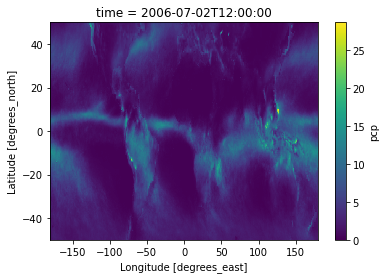

In [5]:
prcp.isel(time=0).plot()

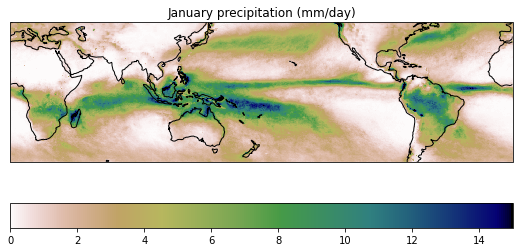

In [6]:
# Make a prettier plot
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.gist_earth_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(prcp.isel(time=0)).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap1, add_colorbar=False, add_labels=False, vmax=15)
ax.coastlines()
plt.title('January precipitation (mm/day)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Exercise 
Plot July minus January precipitation

## Seasonal variation of precipitation
Let's calculate the zonal average of precipitation

In [60]:
prcp_lat=prcp.mean(dim='longitude')
prcp_lat

<xarray.DataArray 'pcp' (time: 12, latitude: 400)>
array([[1.8744817, 1.916138 , 1.9629776, ..., 2.1532152, 2.1033013,
        2.0468411],
       [1.9292648, 1.9576263, 2.0120928, ..., 1.8469588, 1.7866266,
        1.7354906],
       [2.1372592, 2.1629179, 2.2192285, ..., 1.714425 , 1.6476468,
        1.5930899],
       ...,
       [1.2699678, 1.2908655, 1.3232787, ..., 2.5762372, 2.5303495,
        2.484617 ],
       [1.4168047, 1.4480155, 1.4981103, ..., 2.4690504, 2.4164412,
        2.3564718],
       [1.5069417, 1.5423584, 1.5930742, ..., 2.3892093, 2.3365   ,
        2.2742906]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2006-07-02T12:00:00 ... 2007-06-01T17:20:00
  * latitude  (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88

or <br>
prcp_lat=prcp.mean(axis=2)

And plot. Please note that the time axis is completely wrong.

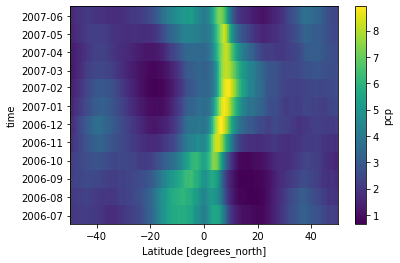

In [61]:
prcp_lat.plot()

Let's create a variable mon.

In [57]:
mon=np.arange(1,13) 
mon

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Let's make the plot prettier.

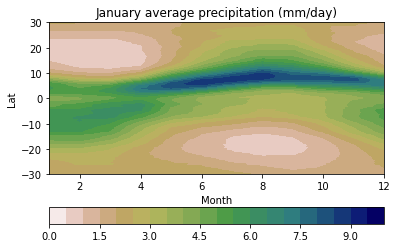

In [41]:
# Make a plot

# set contour levels
level2 = np.arange(0,10.5,0.5)
ax2 = plt.axes()
cs2=plt.contourf(mon,ds1.latitude,prcp_lat.T,  # Changed the axes
                cmap=cmap1, levels=level2)
plt.title('January average precipitation (mm/day)') #title
plt.xlabel('Month')
plt.ylabel('Lat')
plt.ylim(-30,30)
plt.colorbar(cs2, orientation='horizontal') # color map

## Precipitation seasonality in Africa
Calculate and plot the zonal average of precipitation between -20E to 50E.

In [52]:
prcp_af=prcp.sel(longitude=slice(-20,50)).mean(dim='longitude')

Let's first check how longitude is written.

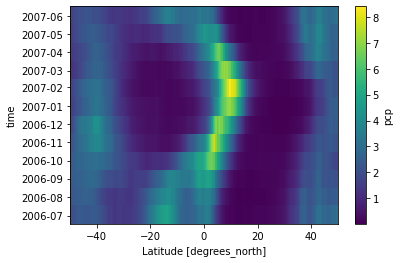

In [53]:
prcp_af.plot()

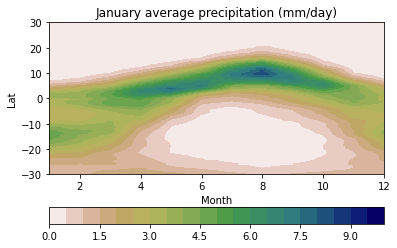

In [54]:
# Make a prettier plot

# set contour levels
level2 = np.arange(0,10.5,0.5)
ax2 = plt.axes()
cs2=plt.contourf(mon,ds1.latitude,prcp_af.T,  # Changed the axes
                cmap=cmap1, levels=level2)
plt.title('January average precipitation (mm/day)') #title
plt.xlabel('Month')
plt.ylabel('Lat')
plt.ylim(-30,30)
plt.colorbar(cs2, orientation='horizontal') # color map

### Exercise
## Precipitation seasonality in Asia
Calculate and plot the zonal average of precipitation between 60E to 120E.

Calculate average precipitation in Asia.

Make a contour plot.